In [1]:
#Imports
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Locate in CSVs
censusDataRead = "../ETL/ETL-Results/census_data.csv"
mortDataRead = "../ETL/ETL-Results/four_mort_measures.csv"

In [3]:
#Read CSVs
censusData = pd.read_csv(censusDataRead, sep=",")
mortData = pd.read_csv(mortDataRead, sep=",")

In [4]:
#View census data
censusData.head()

,County Name,State,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,Percent One Race White,Percent One Race Black+,Percent One Race American Indian+,Percent One Race Asian,Percent One Race Hawaiian+,Percent One Race Some Other,Percent Two Race Or More,State Code,County Code
0,FAYETTE,Illinois,IL,46650,57836,21565,17.2,8.0,49.5,11.3,93.9,4.7,0.3,0.5,0.1,0.1,0.4,17,51
1,LOGAN,Illinois,IL,57308,74457,29003,9.3,8.1,48.8,19.9,88.5,6.9,0.3,0.8,0.0,0.8,2.8,17,107
2,SALINE,Illinois,IL,44090,54492,23994,21.1,8.6,51.1,19.2,92.7,2.6,0.2,0.7,0.2,0.5,3.0,17,165
3,LAKE,Illinois,IL,89427,108478,701473,7.9,5.8,54.7,45.3,75.8,6.8,0.3,7.7,0.0,6.5,2.9,17,97
4,MASSAC,Illinois,IL,47481,61028,14219,16.7,9.3,56.6,13.9,91.1,5.8,0.0,0.2,0.0,0.0,2.8,17,127


In [5]:
#Drop race for Erica
censusDataDrop = censusData.drop(columns=['Percent One Race White', 'Percent One Race Black+', 'Percent One Race American Indian+', 'Percent One Race Asian', 'Percent One Race Hawaiian+', 'Percent One Race Some Other', 'Percent Two Race Or More'])
demoDataGen = censusDataDrop
demoDataGen.head()

,County Name,State,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
0,FAYETTE,Illinois,IL,46650,57836,21565,17.2,8.0,49.5,11.3,17,51
1,LOGAN,Illinois,IL,57308,74457,29003,9.3,8.1,48.8,19.9,17,107
2,SALINE,Illinois,IL,44090,54492,23994,21.1,8.6,51.1,19.2,17,165
3,LAKE,Illinois,IL,89427,108478,701473,7.9,5.8,54.7,45.3,17,97
4,MASSAC,Illinois,IL,47481,61028,14219,16.7,9.3,56.6,13.9,17,127


In [6]:
# Combine the data into a single dataset
genDataComplete = pd.merge(mortData, demoDataGen, how = "inner", right_on = ["State Abbr", "County Name"],
                        left_on = ["State", "County Name"])
#View DF
genDataComplete.head()

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
0,50704,MISSION COMMUNITY HOSPITAL,14850 ROSCOE BLVD,PANORAMA CITY,CA,91402,LOS ANGELES,MORT_30_COPD,Death rate for COPD patients,207,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37
1,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,LOS ANGELES,MORT_30_COPD,Death rate for COPD patients,504,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37
2,50739,CENTINELA HOSPITAL MEDICAL CENTER,555 EAST HARDY STREET,INGLEWOOD,CA,90301,LOS ANGELES,MORT_30_HF,Death rate for heart failure patients,568,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37
3,50763,"L A DOWNTOWN MEDICAL CENTER, LLC",1711 WEST TEMPLE STREET,LOS ANGELES,CA,90026,LOS ANGELES,MORT_30_COPD,Death rate for COPD patients,166,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37
4,50096,"WEST COVINA MEDICAL CENTER, INC",725 S ORANGE AVE,WEST COVINA,CA,91790,LOS ANGELES,MORT_30_COPD,Death rate for COPD patients,146,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37


In [24]:
#Filter to Oregon
ORGenData = genDataComplete.loc[genDataComplete["State_x"] == "OR"]
ORGenData

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
642,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,430,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
643,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_HF,Death rate for heart failure patients,667,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
644,380007,LEGACY EMANUEL MEDICAL CENTER,2801 N GANTENBEIN AVENUE,PORTLAND,OR,97227,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,80,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
645,380025,LEGACY MOUNT HOOD MEDICAL CENTER,24800 SE STARK STREET,GRESHAM,OR,97030,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,98,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
646,380060,ADVENTIST HEALTH PORTLAND,10123 SE MARKET STREET,PORTLAND,OR,97216,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,103,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12000,381325,GOOD SHEPHERD MEDICAL CENTER,610 NW 11TH STREET,HERMISTON,OR,97838,UMATILLA,MORT_30_PN,Death rate for pneumonia patients,122,...,OR,54699,64956,77129,17.9,9.1,49.1,17.2,41,59
12617,381322,CURRY GENERAL HOSPITAL,94220 FOURTH STREET,GOLD BEACH,OR,97444,CURRY,MORT_30_COPD,Death rate for COPD patients,35,...,OR,48440,61946,22650,12.4,15.4,53.2,24.6,41,15
12618,381322,CURRY GENERAL HOSPITAL,94220 FOURTH STREET,GOLD BEACH,OR,97444,CURRY,MORT_30_HF,Death rate for heart failure patients,43,...,OR,48440,61946,22650,12.4,15.4,53.2,24.6,41,15
12619,381322,CURRY GENERAL HOSPITAL,94220 FOURTH STREET,GOLD BEACH,OR,97444,CURRY,MORT_30_PN,Death rate for pneumonia patients,87,...,OR,48440,61946,22650,12.4,15.4,53.2,24.6,41,15


In [8]:
#Make COPD DF
COPD = ORGenData.loc[ORGenData["Measure Name"] == "Death rate for COPD patients"]
COPD.head()

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
642,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,430,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
644,380007,LEGACY EMANUEL MEDICAL CENTER,2801 N GANTENBEIN AVENUE,PORTLAND,OR,97227,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,80,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
645,380025,LEGACY MOUNT HOOD MEDICAL CENTER,24800 SE STARK STREET,GRESHAM,OR,97030,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,98,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
646,380060,ADVENTIST HEALTH PORTLAND,10123 SE MARKET STREET,PORTLAND,OR,97216,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,103,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
647,380061,PROVIDENCE PORTLAND MEDICAL CENTER,4805 NE GLISAN STREET,PORTLAND,OR,97213,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,148,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51


The r-value is: -0.3131801417915908
The r2-value is: 0.09808180121260093
The p-value is: 0.02523867193336639


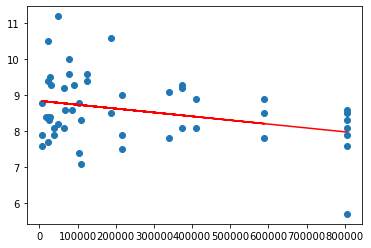

In [9]:
# Plot a scatter and regression Total Population, and COPD Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(COPD["Total Population"], COPD["Score"])
regress_values = COPD["Total Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(COPD["Total Population"], regress_values, "r-")
ax.scatter(COPD["Total Population"], COPD["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.10029985731949974
The r2-value is: 0.010060061378312005
The p-value is: 0.48374264611758455


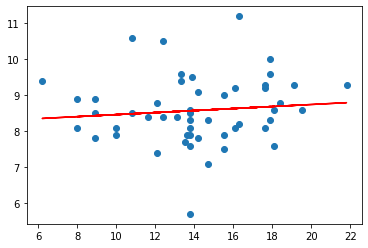

In [10]:
# Plot a scatter and regression Poverty, and COPD Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(COPD["Percent Poverty"], COPD["Score"])
regress_values = COPD["Percent Poverty"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(COPD["Percent Poverty"], regress_values, "r-")
ax.scatter(COPD["Percent Poverty"], COPD["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.1554806450221592
The r2-value is: 0.024174230976506676
The p-value is: 0.2759471876468655


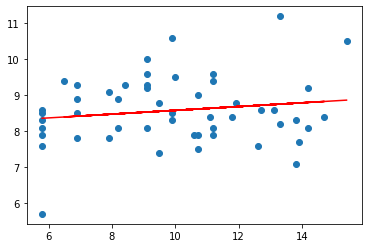

In [11]:
# Plot a scatter and regression Poverty, and COPD Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(COPD["Percent Veteran"], COPD["Score"])
regress_values = COPD["Percent Veteran"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(COPD["Percent Veteran"], regress_values, "r-")
ax.scatter(COPD["Percent Veteran"], COPD["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.08682662559541776
The r2-value is: 0.007538862912286855
The p-value is: 0.544621097182922


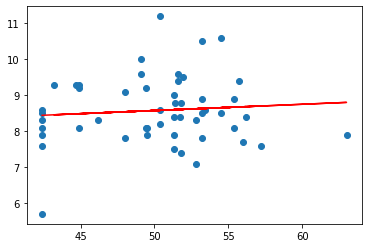

In [13]:
# Plot a scatter and regression Married, and COPD Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(COPD["Percent Married"], COPD["Score"])
regress_values = COPD["Percent Married"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(COPD["Percent Married"], regress_values, "r-")
ax.scatter(COPD["Percent Married"], COPD["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: -0.18253248855532664
The r2-value is: 0.03331810937820045
The p-value is: 0.19983271566095404


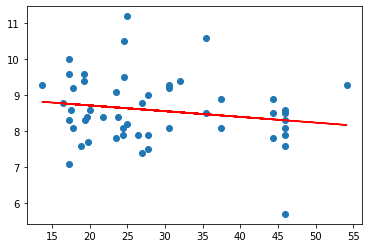

In [14]:
# Plot a scatter and regression Bachelor, and COPD Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(COPD["Percent Bachelor"], COPD["Score"])
regress_values = COPD["Percent Bachelor"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(COPD["Percent Bachelor"], regress_values, "r-")
ax.scatter(COPD["Percent Bachelor"], COPD["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

In [25]:
#Make Heart Failure DF
HFDF = ORGenData.loc[ORGenData["Measure Name"] == "Death rate for heart failure patients"]
HFDF.head()

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
643,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_HF,Death rate for heart failure patients,667,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
651,380061,PROVIDENCE PORTLAND MEDICAL CENTER,4805 NE GLISAN STREET,PORTLAND,OR,97213,MULTNOMAH,MORT_30_HF,Death rate for heart failure patients,417,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
652,380007,LEGACY EMANUEL MEDICAL CENTER,2801 N GANTENBEIN AVENUE,PORTLAND,OR,97227,MULTNOMAH,MORT_30_HF,Death rate for heart failure patients,141,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
654,380009,OHSU HOSPITAL AND CLINICS,3181 SW SAM JACKSON PARK ROAD,PORTLAND,OR,97239,MULTNOMAH,MORT_30_HF,Death rate for heart failure patients,281,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
655,380017,LEGACY GOOD SAMARITAN MEDICAL CENTER,"1015 NW 22ND AVENUE, W121",PORTLAND,OR,97210,MULTNOMAH,MORT_30_HF,Death rate for heart failure patients,220,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51


The r-value is: -0.34252164229184306
The r2-value is: 0.1173210754383013
The p-value is: 0.012932976625181317


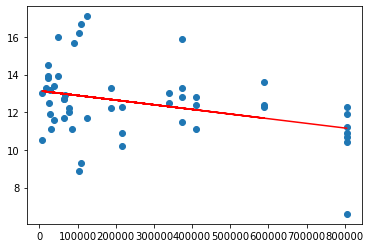

In [17]:
# Plot a scatter and regression Total Population, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HFDF["Total Population"], HFDF["Score"])
regress_values = HFDF["Total Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HFDF["Total Population"], regress_values, "r-")
ax.scatter(HFDF["Total Population"], HFDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: -0.03256391997935583
The r2-value is: 0.0010604088844218898
The p-value is: 0.8187335217151213


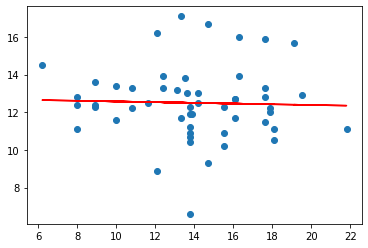

In [19]:
# Plot a scatter and regression Percent Poverty, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HFDF["Percent Poverty"], HFDF["Score"])
regress_values = HFDF["Percent Poverty"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HFDF["Percent Poverty"], regress_values, "r-")
ax.scatter(HFDF["Percent Poverty"], HFDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.24190746153668763
The r2-value is: 0.058519219947124
The p-value is: 0.08402785231927265


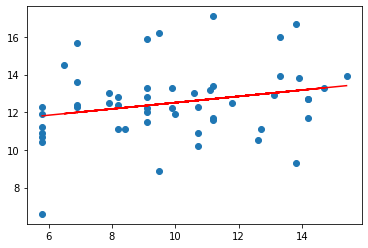

In [20]:
# Plot a scatter and regression Percent Veteran, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HFDF["Percent Veteran"], HFDF["Score"])
regress_values = HFDF["Percent Veteran"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HFDF["Percent Veteran"], regress_values, "r-")
ax.scatter(HFDF["Percent Veteran"], HFDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.20735111606680154
The r2-value is: 0.0429944853341482
The p-value is: 0.14022169455113478


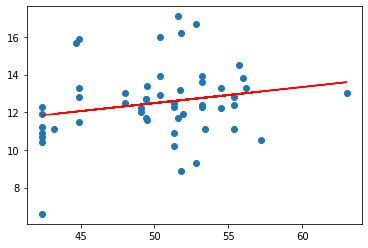

In [21]:
# Plot a scatter and regression Percent Married, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HFDF["Percent Married"], HFDF["Score"])
regress_values = HFDF["Percent Married"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HFDF["Percent Married"], regress_values, "r-")
ax.scatter(HFDF["Percent Married"], HFDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: -0.14749967181477994
The r2-value is: 0.021756153185467787
The p-value is: 0.296716629890249


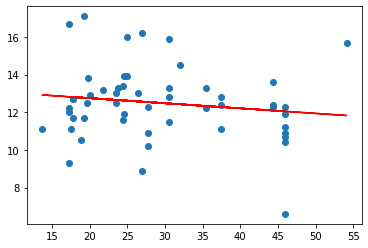

In [22]:
# Plot a scatter and regression Percent Bachelor, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HFDF["Percent Bachelor"], HFDF["Score"])
regress_values = HFDF["Percent Bachelor"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HFDF["Percent Bachelor"], regress_values, "r-")
ax.scatter(HFDF["Percent Bachelor"], HFDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

In [26]:
#Death rate for pneumonia patients
#Make pneumonia DF
PNDF = ORGenData.loc[ORGenData["Measure Name"] == "Death rate for pneumonia patients"]
PNDF.head()

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
650,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_PN,Death rate for pneumonia patients,408,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
656,380017,LEGACY GOOD SAMARITAN MEDICAL CENTER,"1015 NW 22ND AVENUE, W121",PORTLAND,OR,97210,MULTNOMAH,MORT_30_PN,Death rate for pneumonia patients,196,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
663,380025,LEGACY MOUNT HOOD MEDICAL CENTER,24800 SE STARK STREET,GRESHAM,OR,97030,MULTNOMAH,MORT_30_PN,Death rate for pneumonia patients,179,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
664,380061,PROVIDENCE PORTLAND MEDICAL CENTER,4805 NE GLISAN STREET,PORTLAND,OR,97213,MULTNOMAH,MORT_30_PN,Death rate for pneumonia patients,333,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
667,380007,LEGACY EMANUEL MEDICAL CENTER,2801 N GANTENBEIN AVENUE,PORTLAND,OR,97227,MULTNOMAH,MORT_30_PN,Death rate for pneumonia patients,114,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51


The r-value is: -0.5621295649876977
The r2-value is: 0.3159896478332583
The p-value is: 5.357587902397731e-06


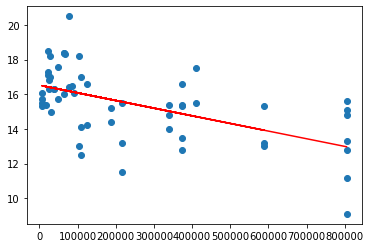

In [27]:
# Plot a scatter and regression Total Population, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(PNDF["Total Population"], PNDF["Score"])
regress_values = PNDF["Total Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(PNDF["Total Population"], regress_values, "r-")
ax.scatter(PNDF["Total Population"], PNDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.059474170090502196
The r2-value is: 0.003537176907953986
The p-value is: 0.6603270672754977


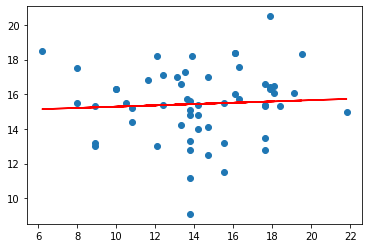

In [28]:
# Plot a scatter and regression Percent Poverty, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(PNDF["Percent Poverty"], PNDF["Score"])
regress_values = PNDF["Percent Poverty"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(PNDF["Percent Poverty"], regress_values, "r-")
ax.scatter(PNDF["Percent Poverty"], PNDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.3870603859775067
The r2-value is: 0.14981574239305645
The p-value is: 0.002935810082709174


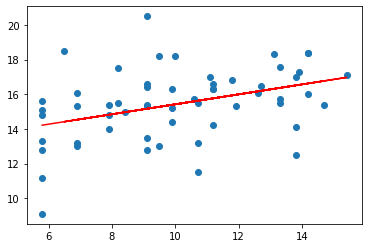

In [29]:
# Plot a scatter and regression Percent Veteran, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(PNDF["Percent Veteran"], PNDF["Score"])
regress_values = PNDF["Percent Veteran"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(PNDF["Percent Veteran"], regress_values, "r-")
ax.scatter(PNDF["Percent Veteran"], PNDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.29878145118642996
The r2-value is: 0.08927035557306903
The p-value is: 0.023969614434485115


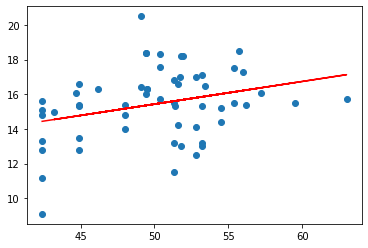

In [30]:
# Plot a scatter and regression Percent Married, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(PNDF["Percent Married"], PNDF["Score"])
regress_values = PNDF["Percent Married"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(PNDF["Percent Married"], regress_values, "r-")
ax.scatter(PNDF["Percent Married"], PNDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: -0.43794165634665977
The r2-value is: 0.19179289436365585
The p-value is: 0.0006568854171553227


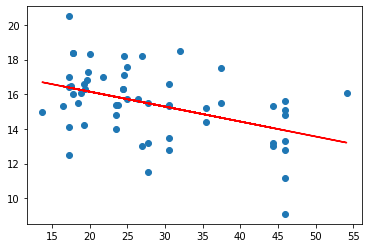

In [31]:
# Plot a scatter and regression Percent Bachelor, and Heart Failture Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(PNDF["Percent Bachelor"], PNDF["Score"])
regress_values = PNDF["Percent Bachelor"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(PNDF["Percent Bachelor"], regress_values, "r-")
ax.scatter(PNDF["Percent Bachelor"], PNDF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

In [32]:
#Death rate for heart attack patients
#Make pneumonia DF
HADF = ORGenData.loc[ORGenData["Measure Name"] == "Death rate for heart attack patients"]
HADF.head()

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
653,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_AMI,Death rate for heart attack patients,184,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
657,380017,LEGACY GOOD SAMARITAN MEDICAL CENTER,"1015 NW 22ND AVENUE, W121",PORTLAND,OR,97210,MULTNOMAH,MORT_30_AMI,Death rate for heart attack patients,123,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
659,380009,OHSU HOSPITAL AND CLINICS,3181 SW SAM JACKSON PARK ROAD,PORTLAND,OR,97239,MULTNOMAH,MORT_30_AMI,Death rate for heart attack patients,160,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
660,380007,LEGACY EMANUEL MEDICAL CENTER,2801 N GANTENBEIN AVENUE,PORTLAND,OR,97227,MULTNOMAH,MORT_30_AMI,Death rate for heart attack patients,81,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
662,380025,LEGACY MOUNT HOOD MEDICAL CENTER,24800 SE STARK STREET,GRESHAM,OR,97030,MULTNOMAH,MORT_30_AMI,Death rate for heart attack patients,46,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51


The r-value is: -0.38276647000147646
The r2-value is: 0.14651017055739118
The p-value is: 0.05895962943410153


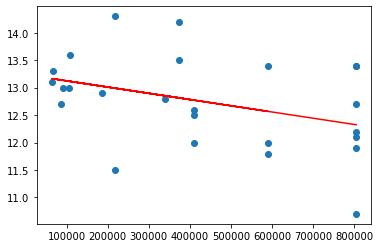

In [33]:
# Plot a scatter and regression Total Population, and Heart Attack Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HADF["Total Population"], HADF["Score"])
regress_values = HADF["Total Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HADF["Total Population"], regress_values, "r-")
ax.scatter(HADF["Total Population"], HADF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.3571902837235717
The r2-value is: 0.12758489878652565
The p-value is: 0.0796241819435801


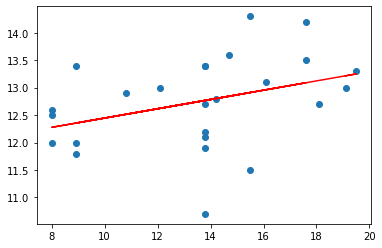

In [34]:
# Plot a scatter and regression Percent Poverty, and Heart Attack Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HADF["Percent Poverty"], HADF["Score"])
regress_values = HADF["Percent Poverty"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HADF["Percent Poverty"], regress_values, "r-")
ax.scatter(HADF["Percent Poverty"], HADF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.3777313934331674
The r2-value is: 0.1426810055849623
The p-value is: 0.06265748756729064


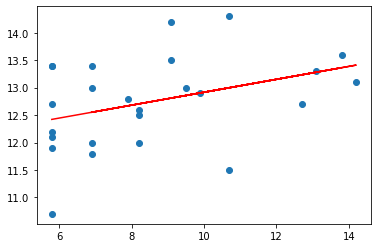

In [35]:
# Plot a scatter and regression Percent Veteran, and Heart Attack Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HADF["Percent Veteran"], HADF["Score"])
regress_values = HADF["Percent Veteran"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HADF["Percent Veteran"], regress_values, "r-")
ax.scatter(HADF["Percent Veteran"], HADF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.02931551306797024
The r2-value is: 0.0008593993064383339
The p-value is: 0.8893688842650487


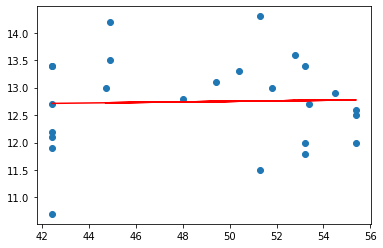

In [36]:
# Plot a scatter and regression Percent Married, and Heart Attack Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HADF["Percent Married"], HADF["Score"])
regress_values = HADF["Percent Married"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HADF["Percent Married"], regress_values, "r-")
ax.scatter(HADF["Percent Married"], HADF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: -0.36620932502658965
The r2-value is: 0.1341092697364304
The p-value is: 0.07179118274065982


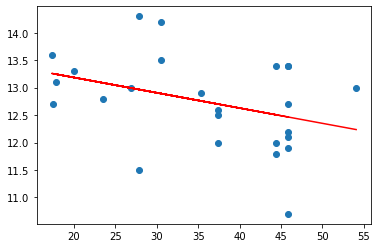

In [37]:
# Plot a scatter and regression Percent Bachelor, and Heart Attack Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(HADF["Percent Bachelor"], HADF["Score"])
regress_values = HADF["Percent Bachelor"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(HADF["Percent Bachelor"], regress_values, "r-")
ax.scatter(HADF["Percent Bachelor"], HADF["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()